# Optimizing a Lineaire regression model with both `Gradient Descent` & `Newton's method`

1. Generating a random data with 100 line using `numpy`: 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [11]:
np.random.seed(42)

x = np.random.rand(100, 1) * 10  

true_slope = 2
true_intercept = 5
noise = np.random.randn(100, 1)
y = true_slope * x + true_intercept + noise

df = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})

2. Splitting the Data to `Train` & `Test`

In [12]:
X = df[['x']]
y = df['y']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Optimizing using `Gradient Descent`:

In [14]:
def gradient_descent(X, y, learning_rate=0.01, n_iters=1000):
    X = np.array(X)
    y = np.array(y)
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    for _ in range(n_iters):
        y_pred = np.dot(X, weights) + bias
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias

grad_weights, grad_bias = gradient_descent(X_train, y_train)
grad_weights, grad_bias


(array([2.00778896]), np.float64(4.834534792680418))

4. Optimizing using `Newton method`:

In [15]:
def newton_optimization(X, y, n_iters=1000):
    X = np.array(X)
    y = np.array(y)
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    for _ in range(n_iters):
        y_pred = np.dot(X, weights) + bias
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)
        H = (1 / n_samples) * np.dot(X.T, X)
        H_inv = np.linalg.inv(H)
        weights -= np.dot(H_inv, dw)
        bias -= np.sum(H_inv * db)
    return weights, bias

new_weights, new_bias = newton_optimization(X_train, y_train)
new_weights, new_bias

(array([1.95995465]), np.float64(5.142334710520829))

5. implementing both equations based on the `weight` and `bias` of previous optimizations:

In [16]:
y_pred_line1 = X_train @ grad_weights + grad_bias
y_pred_line2 = X_train @ new_weights + new_bias

6. Plotting both lines:

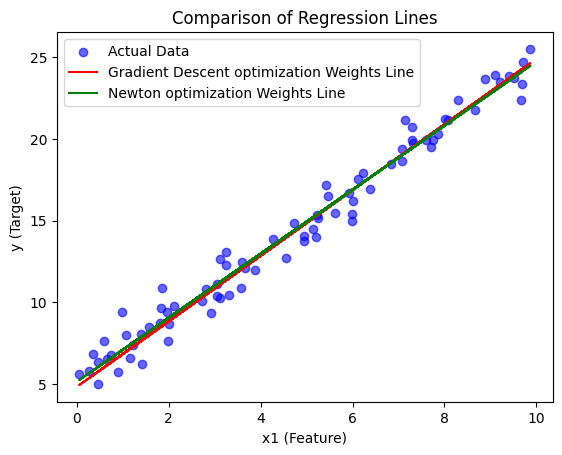

In [17]:
plt.scatter(X_train, y_train, color='blue', label="Actual Data", alpha=0.6)

plt.plot(X_train, y_pred_line1, color='red', label="Gradient Descent optimization Weights Line")

plt.plot(X_train, y_pred_line2, color='green', label="Newton optimization Weights Line")

plt.title("Comparison of Regression Lines")
plt.xlabel("x1 (Feature)")
plt.ylabel("y (Target)")
plt.legend()
plt.show()

7. Test Set Performance Metrics:

In [18]:
y_test_pred1 = X_test @ grad_weights + grad_bias
y_test_pred2 = X_test @ new_weights + new_bias

r2_test1 = r2_score(y_test, y_test_pred1) * 100  
r2_test2 = r2_score(y_test, y_test_pred2) * 100

mae_test1 = mean_absolute_error(y_test, y_test_pred1)
mae_test2 = mean_absolute_error(y_test, y_test_pred2)

mean_y_test = np.mean(y_test)
accuracy_test1 = (1 - mae_test1 / mean_y_test) * 100
accuracy_test2 = (1 - mae_test2 / mean_y_test) * 100

print("Test Set Performance Metrics:")
print(f"Gradient Descent optimization Weights Line - R-squared Accuracy: {r2_test1:.2f}%, Mean Accuracy: {accuracy_test1:.2f}%")
print(f"Newton optimization Weights Line - R-squared Accuracy: {r2_test2:.2f}%, Mean Accuracy: {accuracy_test2:.2f}%")

Test Set Performance Metrics:
Gradient Descent optimization Weights Line - R-squared Accuracy: 98.01%, Mean Accuracy: 95.46%
Newton optimization Weights Line - R-squared Accuracy: 98.25%, Mean Accuracy: 95.99%
